# Assignment_4 DT

In [25]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf_1 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_1.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

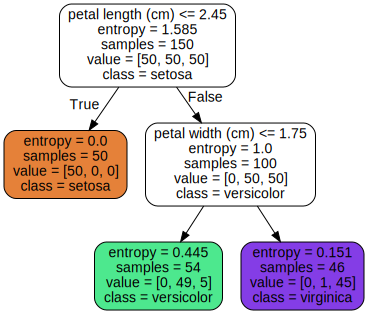

In [27]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz
def draw(clf,file):
  export_graphviz(
          clf,
          out_file=os.path.join("./", file),
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True,
          filled=True
      )
draw(tree_clf_1,"iris_tree1.dot")
Source.from_file(os.path.join("./", "iris_tree1.dot"))



## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

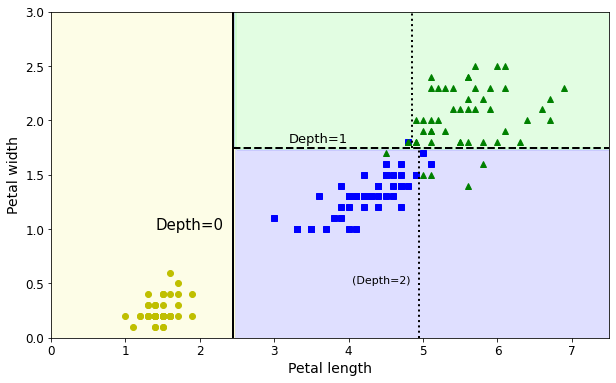

In [29]:
plt.figure(figsize=(10, 6))

plot_decision_boundary(tree_clf_1, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

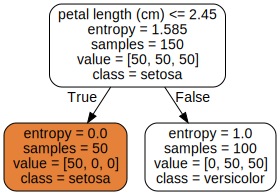

In [30]:
tree_clf_2 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf_2.fit(X, y)

draw(tree_clf_2,"iris_tree2.dot")
Source.from_file(os.path.join("./", "iris_tree2.dot"))

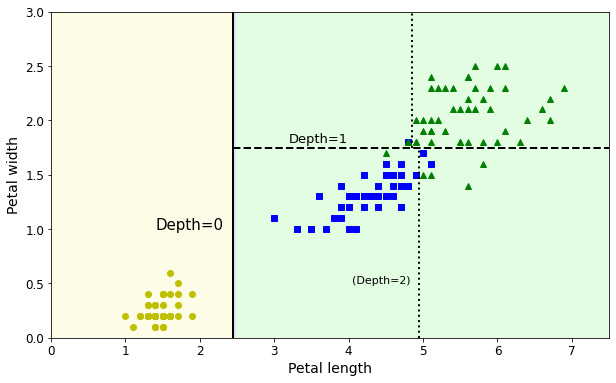

In [31]:
plt.figure(figsize=(10, 6))

plot_decision_boundary(tree_clf_2, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1.

In [32]:
print(tree_clf_2.tree_.impurity) #entropy output in each block

[1.5849625 0.        1.       ]


###**Comment**

Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.
that means when petal length is smaller or equal to 2.45 the uncertenity or unpurity is zero, otherwise it's maximum (we need more nodes)


2.

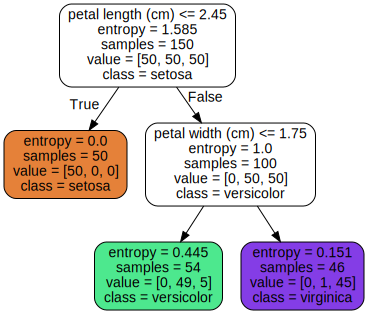

In [33]:
tree_clf_3 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf_3.fit(X, y)

draw(tree_clf_1,"iris_tree1.dot")

Source.from_file(os.path.join("./", "iris_tree1.dot"))


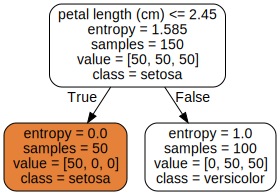

In [34]:
draw(tree_clf_2,"iris_tree2.dot")

Source.from_file(os.path.join("./", "iris_tree2.dot"))

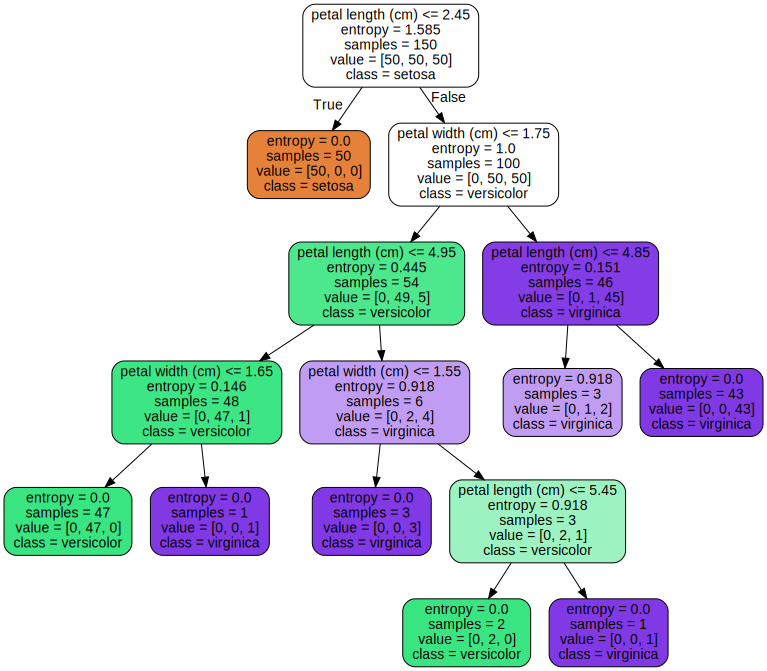

In [35]:
draw(tree_clf_3,"iris_tree3.dot")

Source.from_file(os.path.join("./", "iris_tree3.dot"))

## bigger depth values give more ranges of petal length and petal width, so it gives more information of classes and their possibilites over these ranges.

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. 

In [36]:
X_point = [5,1.5]
prob = []
id = 0
# tree_clf_1.tree_.value[2]
# tree_clf_1.tree_.threshold[1]
for i in range(2):
  if X_point[i] <= tree_clf_1.tree_.threshold[id]:
    id = tree_clf_1.tree_.children_left[id]
  else:
    id = tree_clf_1.tree_.children_right[id]

prob = (tree_clf_1.tree_.value[id])/tree_clf_1.tree_.n_node_samples[id]
prob

array([[0.        , 0.90740741, 0.09259259]])

2.

In [37]:
tree_clf_1.predict_proba([[5,1.5]]) #they have the same values

array([[0.        , 0.90740741, 0.09259259]])

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

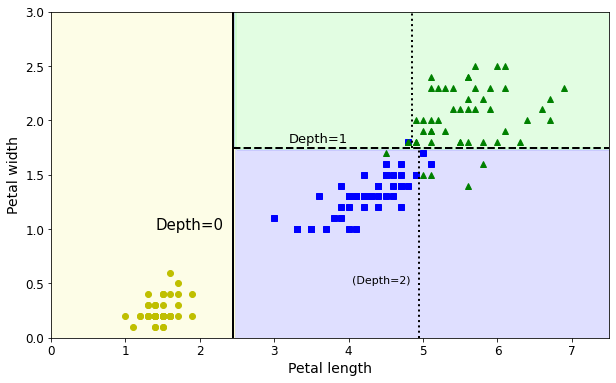

0.9583333333333334


In [38]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, random_state=0)

tree_clf_original = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_original.fit(X,y)

plt.figure(figsize=(10, 6))

plot_decision_boundary(tree_clf_original, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()
print(tree_clf_original.score(X_train_original,y_train_original))

The following cell rotates the data by angle 20

In [39]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)
X_train_rotated, X_test_rotated, y_train_rotated, y_test_rotated = train_test_split(Xr, y, test_size=0.2, random_state=0)


**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

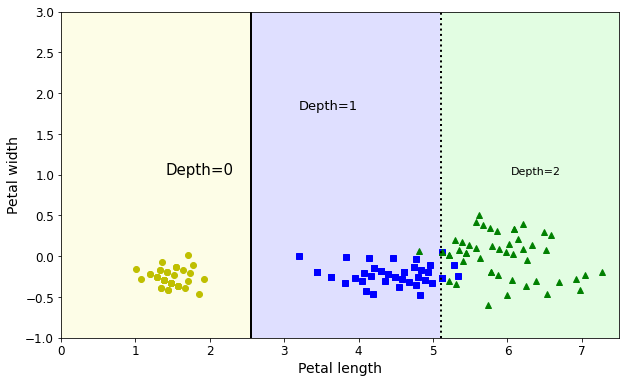

0.9666666666666667


In [40]:
tree_clf_rotated = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_rotated.fit(Xr,y)

plt.figure(figsize=(10, 6))

plot_decision_boundary(tree_clf_rotated, Xr, y,[0, 7.5, -1, 3])

plt.plot([2.55, 2.55], [-1, 3], "k-", linewidth=2)
plt.plot([5.10, 5.10], [-1, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 1, "Depth=2", fontsize=11)
plt.show()
print(tree_clf_rotated.score(X_train_rotated,y_train_rotated))

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [41]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

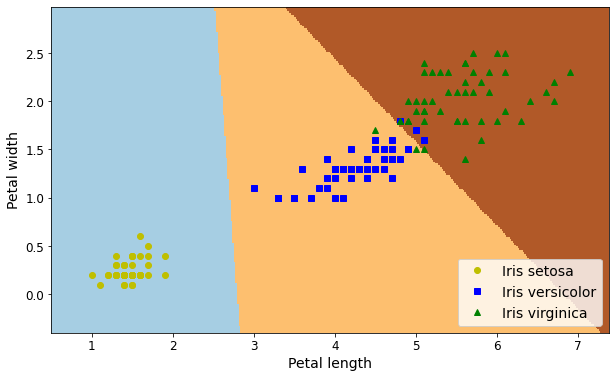

0.9583333333333334


In [42]:
plt.figure(figsize=(10, 6))

logReg_original = LogisticRegression(random_state=0).fit(X, y)

plot_logistic_regression(logReg_original, X, y,[0, 7.5, 0, 3])

print(logReg_original.score(X_train_original,y_train_original))

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

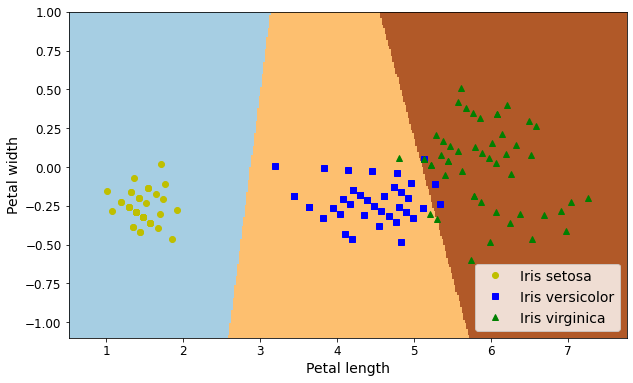

0.9583333333333334


In [43]:
plt.figure(figsize=(10, 6))

logReg_rotated = LogisticRegression(random_state=0).fit(Xr, y)

plot_logistic_regression(logReg_rotated, Xr, y,[0, 7.5, 0, 3])

print(logReg_rotated.score(X_train_rotated,y_train_rotated))

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1.score doesn't change by rotating data in logistic regression but slightly changed in decision tree classifier

2.because changing the values of x-axis doesn't affect the regression results but it affects the classification of the tree

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [44]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples=10000, noise=0.4)


2. Split it into a training set and a test set using train_test_split().

In [45]:
X_train, X_test, y_train, y_test = train_test_split(moons[0], moons[1], test_size=0.2, random_state=0)


3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.
    - Apply GridSearch on a portion of training data.

In [46]:
from sklearn.model_selection import GridSearchCV
dsTree = DecisionTreeClassifier()
search_space = {
    "max_depth" : [1,2,3,4,5,6,7,8,9,10],
    "max_leaf_nodes" : [5,10,15,20,25,30,35,40,45,50],
    "min_samples_split" : [1,2,3,4,5]
}
GS = GridSearchCV(
    estimator = dsTree,
    param_grid = search_space,
)
GS.fit(X_train[0:1000],y_train[0:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                            50],
                         'min_samples_split': [1, 2, 3, 4, 5]})

4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [47]:
dsTreeClassifier = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_split=2)

dsTreeClassifier.fit(X_train,y_train)

y_pred = dsTreeClassifier.predict(X_test)

dsTreeClassifier.score(X_test,y_test)


0.8495

## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. the more the depth value the less the error for our data, so it becomes more overfitting.
2. (max_depth=5) has higher variance, it has more flactuations as it tries to fit the data.
3. (max_depth=2) has higher bias, it has more error between the average prediction and the correct value.

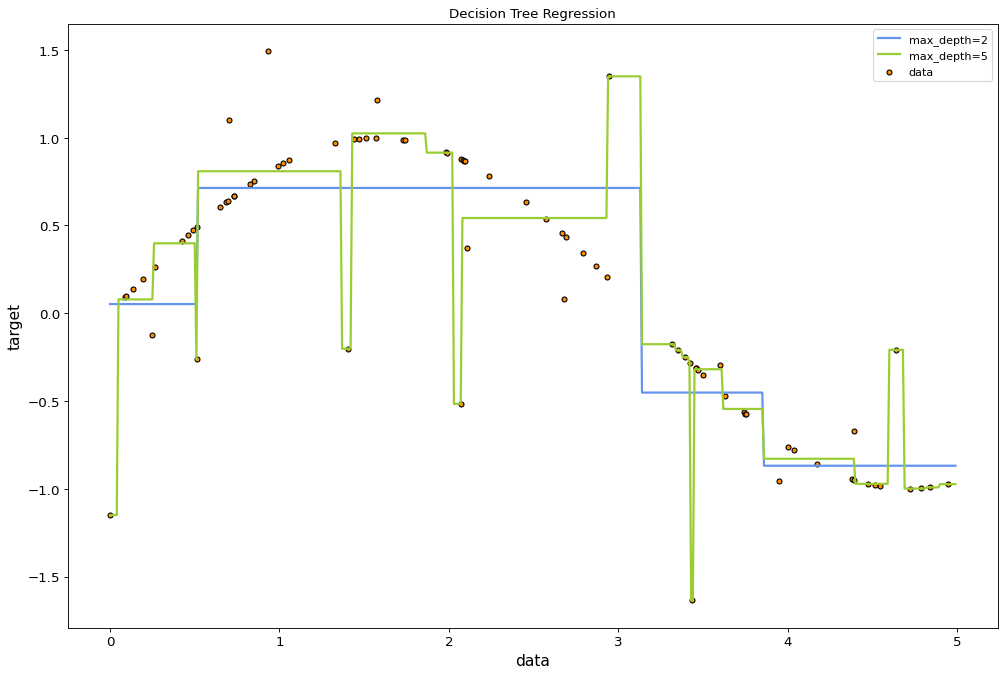

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()